In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')



In [ ]:
df = pd.read_csv('test.csv')
df.head()


Unnamed: 0          datetime  season  weather   temp  humidity  windspeed  \
0           0  20/01/2011 00:00       1        1  10.66        56    26.0027   
1           1  20/01/2011 01:00       1        1  10.66        56     0.0000   
2           2  20/01/2011 02:00       1        1  10.66        56     0.0000   
3           3  20/01/2011 03:00       1        1  10.66        56    11.0014   
4           4  20/01/2011 04:00       1        1  10.66        56    11.0014   

   casual  registered  count  
0       3          13     16  
1       8          32     40  
2       5          27     32  
3       3          10     13  
4       0           1      1

In [ ]:
df.shape


(6493, 10)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6493 non-null   int64  
 1   datetime    6493 non-null   object 
 2   season      6493 non-null   int64  
 3   weather     6493 non-null   int64  
 4   temp        6493 non-null   float64
 5   humidity    6493 non-null   int64  
 6   windspeed   6493 non-null   float64
 7   casual      6493 non-null   int64  
 8   registered  6493 non-null   int64  
 9   count       6493 non-null   int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 507.4+ KB


In [ ]:
df.describe().T


count         mean          std    min        25%        50%  \
Unnamed: 0  6493.0  3246.000000  1874.511981   0.00  1623.0000  3246.0000   
season      6493.0     2.493300     1.091258   1.00     2.0000     3.0000   
weather     6493.0     1.436778     0.648390   1.00     1.0000     1.0000   
temp        6493.0    20.620607     8.059583   0.82    13.9400    21.3200   
humidity    6493.0    64.125212    19.293391  16.00    49.0000    65.0000   
windspeed   6493.0    12.631157     8.250151   0.00     7.0015    11.0014   
casual      6493.0    26.122902    37.785968   0.00     3.0000    11.0000   
registered  6493.0   117.328200   110.554638   0.00    27.0000    92.0000   
count       6493.0   143.451101   132.561785   1.00    32.0000   110.0000   

                  75%        max  
Unnamed: 0  4869.0000  6492.0000  
season         3.0000     4.0000  
weather        2.0000     4.0000  
temp          27.0600    40.1800  
humidity      81.0000   100.0000  
windspeed     16.9979    55.9986  
casual        33.0000   272.0000  
registered   170.0000   579.0000  
count        209.0000   638.0000

In [ ]:
#Feature Engineering

parts = df["datetime"].str.split(" ", n=2, expand=True)
df["date"] = parts[0]
df["time"] = parts[1].str[:2].astype('int')
df.head()


Unnamed: 0          datetime  season  weather   temp  humidity  windspeed  \
0           0  20/01/2011 00:00       1        1  10.66        56    26.0027   
1           1  20/01/2011 01:00       1        1  10.66        56     0.0000   
2           2  20/01/2011 02:00       1        1  10.66        56     0.0000   
3           3  20/01/2011 03:00       1        1  10.66        56    11.0014   
4           4  20/01/2011 04:00       1        1  10.66        56    11.0014   

   casual  registered  count        date  time  
0       3          13     16  20/01/2011     0  
1       8          32     40  20/01/2011     1  
2       5          27     32  20/01/2011     2  
3       3          10     13  20/01/2011     3  
4       0           1      1  20/01/2011     4

In [ ]:
parts = df["date"].str.split("/", n=3, expand=True)
df["day"] = parts[0].astype('int')
df["month"] = parts[1].astype('int')
df["year"] = parts[2].astype('int')
df.head()


Unnamed: 0          datetime  season  weather   temp  humidity  windspeed  \
0           0  20/01/2011 00:00       1        1  10.66        56    26.0027   
1           1  20/01/2011 01:00       1        1  10.66        56     0.0000   
2           2  20/01/2011 02:00       1        1  10.66        56     0.0000   
3           3  20/01/2011 03:00       1        1  10.66        56    11.0014   
4           4  20/01/2011 04:00       1        1  10.66        56    11.0014   

   casual  registered  count        date  time  day  month  year  
0       3          13     16  20/01/2011     0   20      1  2011  
1       8          32     40  20/01/2011     1   20      1  2011  
2       5          27     32  20/01/2011     2   20      1  2011  
3       3          10     13  20/01/2011     3   20      1  2011  
4       0           1      1  20/01/2011     4   20      1  2011

In [ ]:
from datetime import datetime
import calendar


def weekend_or_weekday(year, month, day):

	d = datetime(year, month, day)
	if d.weekday() > 4:
		return 0
	else:
		return 1


df['weekday'] = df.apply(lambda x:
						weekend_or_weekday(x['year'],
											x['month'],
											x['day']),
						axis=1)
df.head()


Unnamed: 0          datetime  season  weather   temp  humidity  windspeed  \
0           0  20/01/2011 00:00       1        1  10.66        56    26.0027   
1           1  20/01/2011 01:00       1        1  10.66        56     0.0000   
2           2  20/01/2011 02:00       1        1  10.66        56     0.0000   
3           3  20/01/2011 03:00       1        1  10.66        56    11.0014   
4           4  20/01/2011 04:00       1        1  10.66        56    11.0014   

   casual  registered  count        date  time  day  month  year  weekday  
0       3          13     16  20/01/2011     0   20      1  2011        1  
1       8          32     40  20/01/2011     1   20      1  2011        1  
2       5          27     32  20/01/2011     2   20      1  2011        1  
3       3          10     13  20/01/2011     3   20      1  2011        1  
4       0           1      1  20/01/2011     4   20      1  2011        1

In [ ]:
def am_or_pm(x):
	if x > 11:
		return 1
	else:
		return 0


df['am_or_pm'] = df['time'].apply(am_or_pm)
df.head()


Unnamed: 0          datetime  season  weather   temp  humidity  windspeed  \
0           0  20/01/2011 00:00       1        1  10.66        56    26.0027   
1           1  20/01/2011 01:00       1        1  10.66        56     0.0000   
2           2  20/01/2011 02:00       1        1  10.66        56     0.0000   
3           3  20/01/2011 03:00       1        1  10.66        56    11.0014   
4           4  20/01/2011 04:00       1        1  10.66        56    11.0014   

   casual  registered  count        date  time  day  month  year  weekday  \
0       3          13     16  20/01/2011     0   20      1  2011        1   
1       8          32     40  20/01/2011     1   20      1  2011        1   
2       5          27     32  20/01/2011     2   20      1  2011        1   
3       3          10     13  20/01/2011     3   20      1  2011        1   
4       0           1      1  20/01/2011     4   20      1  2011        1   

   am_or_pm  
0         0  
1         0  
2         0  
3         0  
4         0

In [ ]:
from datetime import date
import holidays


def is_holiday(x):

	india_holidays = holidays.country_holidays('IN')

	if india_holidays.get(x):
		return 1
	else:
		return 0


df['holidays'] = df['date'].apply(is_holiday)
df.head()


Unnamed: 0          datetime  season  weather   temp  humidity  windspeed  \
0           0  20/01/2011 00:00       1        1  10.66        56    26.0027   
1           1  20/01/2011 01:00       1        1  10.66        56     0.0000   
2           2  20/01/2011 02:00       1        1  10.66        56     0.0000   
3           3  20/01/2011 03:00       1        1  10.66        56    11.0014   
4           4  20/01/2011 04:00       1        1  10.66        56    11.0014   

   casual  registered  count        date  time  day  month  year  weekday  \
0       3          13     16  20/01/2011     0   20      1  2011        1   
1       8          32     40  20/01/2011     1   20      1  2011        1   
2       5          27     32  20/01/2011     2   20      1  2011        1   
3       3          10     13  20/01/2011     3   20      1  2011        1   
4       0           1      1  20/01/2011     4   20      1  2011        1   

   am_or_pm  holidays  
0         0         0  
1         0         0  
2         0         0  
3         0         0  
4         0         0

In [ ]:
df.drop(['datetime', 'date'],
		axis=1,
		inplace=True)


In [ ]:
#Exploratory Data Analysis

df.isnull().sum()


Unnamed: 0    0
season        0
weather       0
temp          0
humidity      0
windspeed     0
casual        0
registered    0
count         0
time          0
day           0
month         0
year          0
weekday       0
am_or_pm      0
holidays      0
dtype: int64

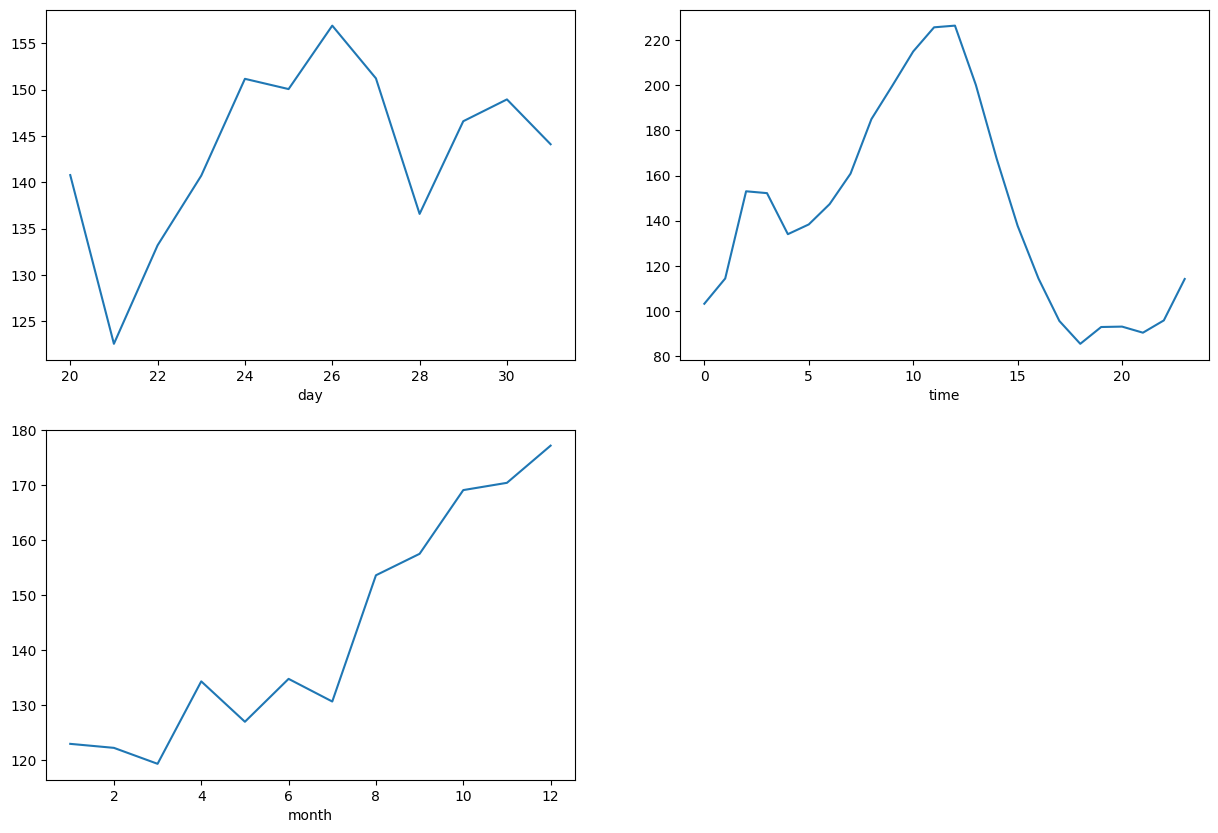

In [ ]:
features = ['day', 'time', 'month']

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
	plt.subplot(2, 2, i + 1)
	df.groupby(col).mean()['count'].plot()
plt.show()


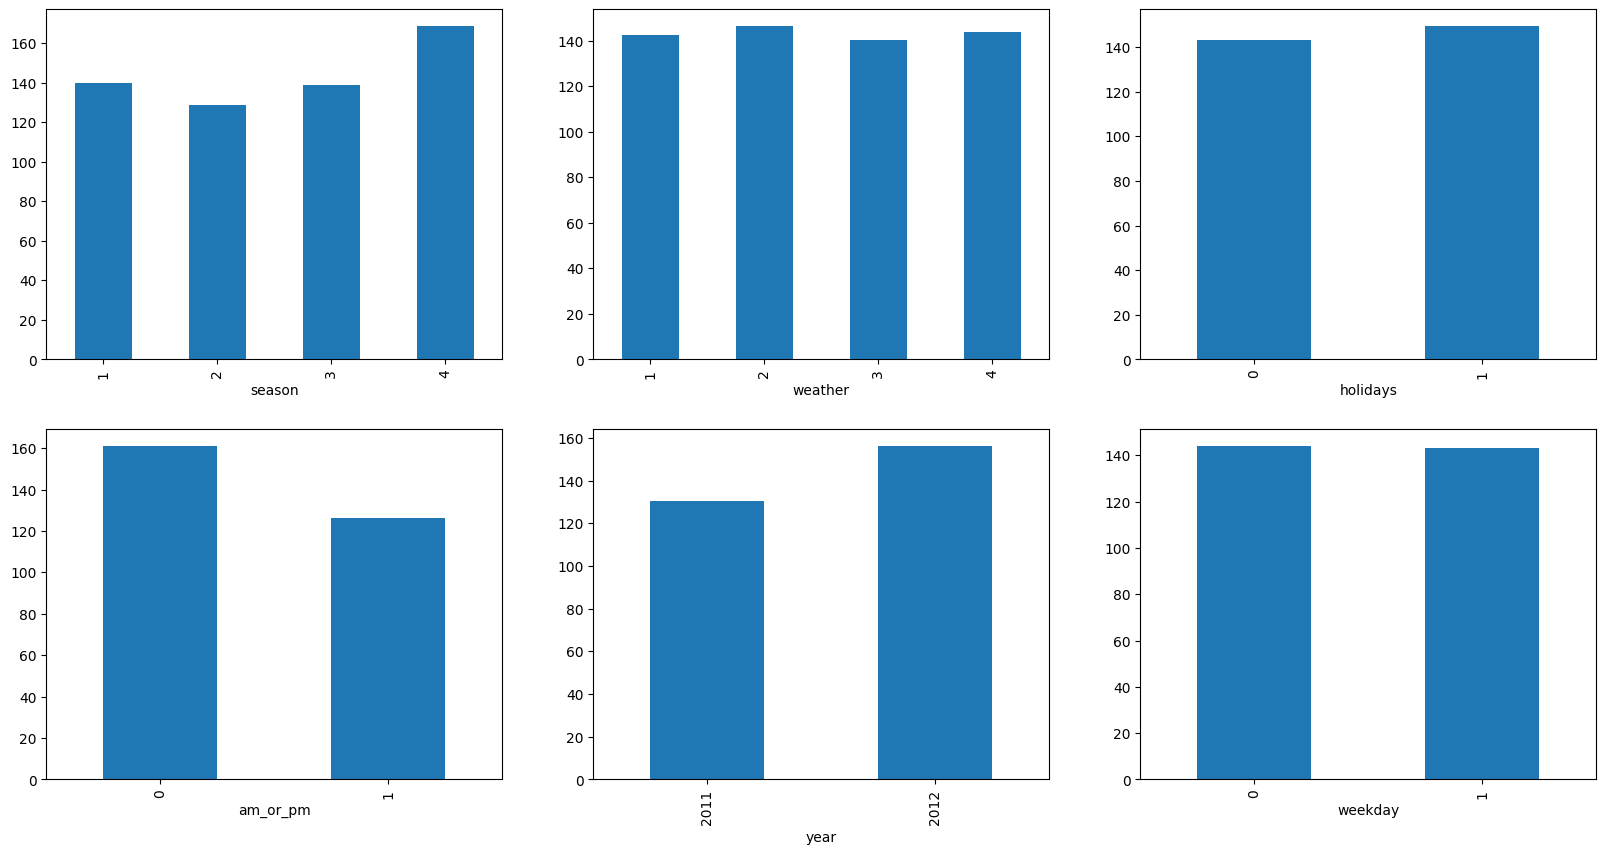

In [ ]:
features = ['season', 'weather', 'holidays',\
			'am_or_pm', 'year', 'weekday']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
	plt.subplot(2, 3, i + 1)
	df.groupby(col).mean()['count'].plot.bar()
plt.show()


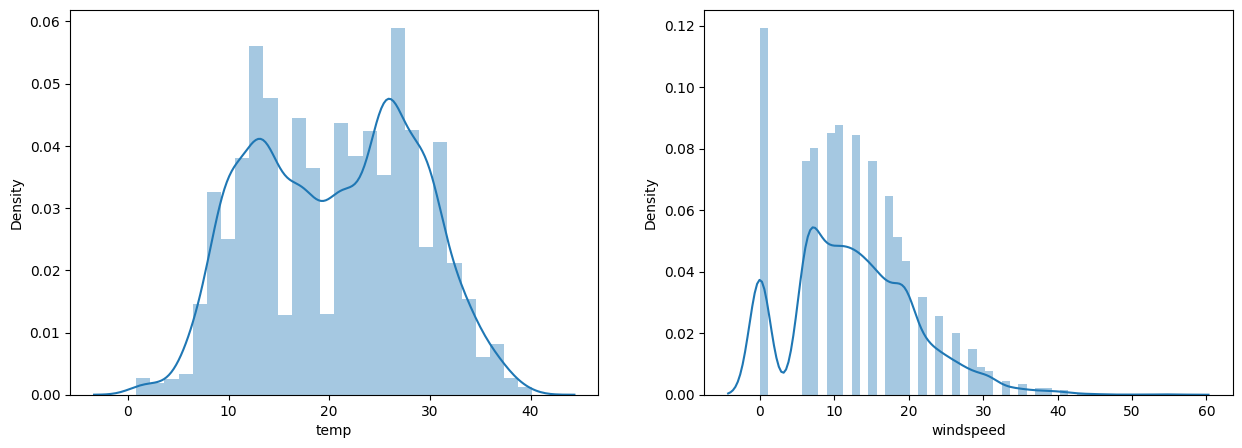

In [ ]:
features = ['temp', 'windspeed']

plt.subplots(figsize=(15, 5))
for i, col in enumerate(features):
  plt.subplot(1, 2, i + 1)
  sb.distplot(df[col])
plt.show()


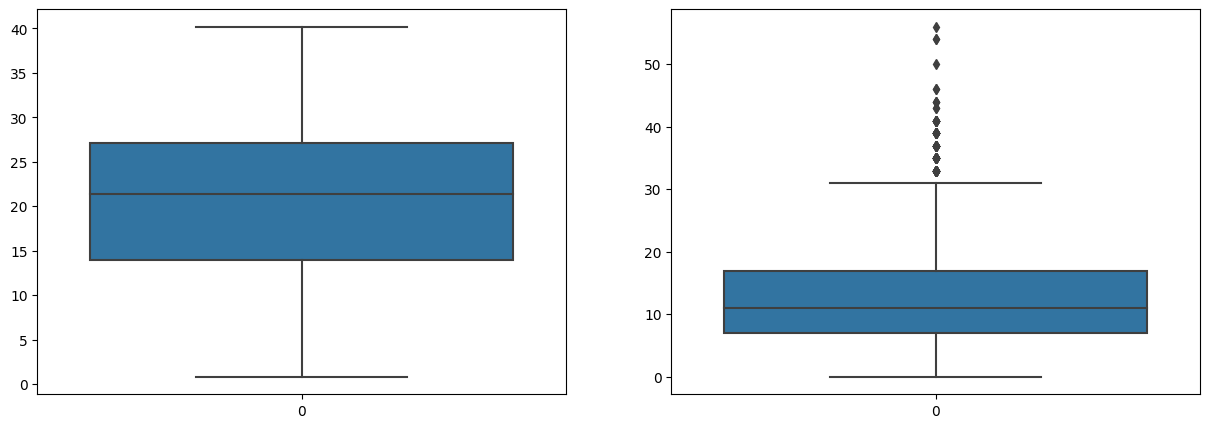

In [ ]:
features = ['temp', 'windspeed']

plt.subplots(figsize=(15, 5))
for i, col in enumerate(features):
  plt.subplot(1, 2, i + 1)
  sb.boxplot(df[col])
plt.show()


In [ ]:
num_rows = df.shape[0] - df[df['windspeed']<32].shape[0]
print(f'Number of rows that will be lost if we remove outliers is equal to {num_rows}.')


Number of rows that will be lost if we remove outliers is equal to 115.


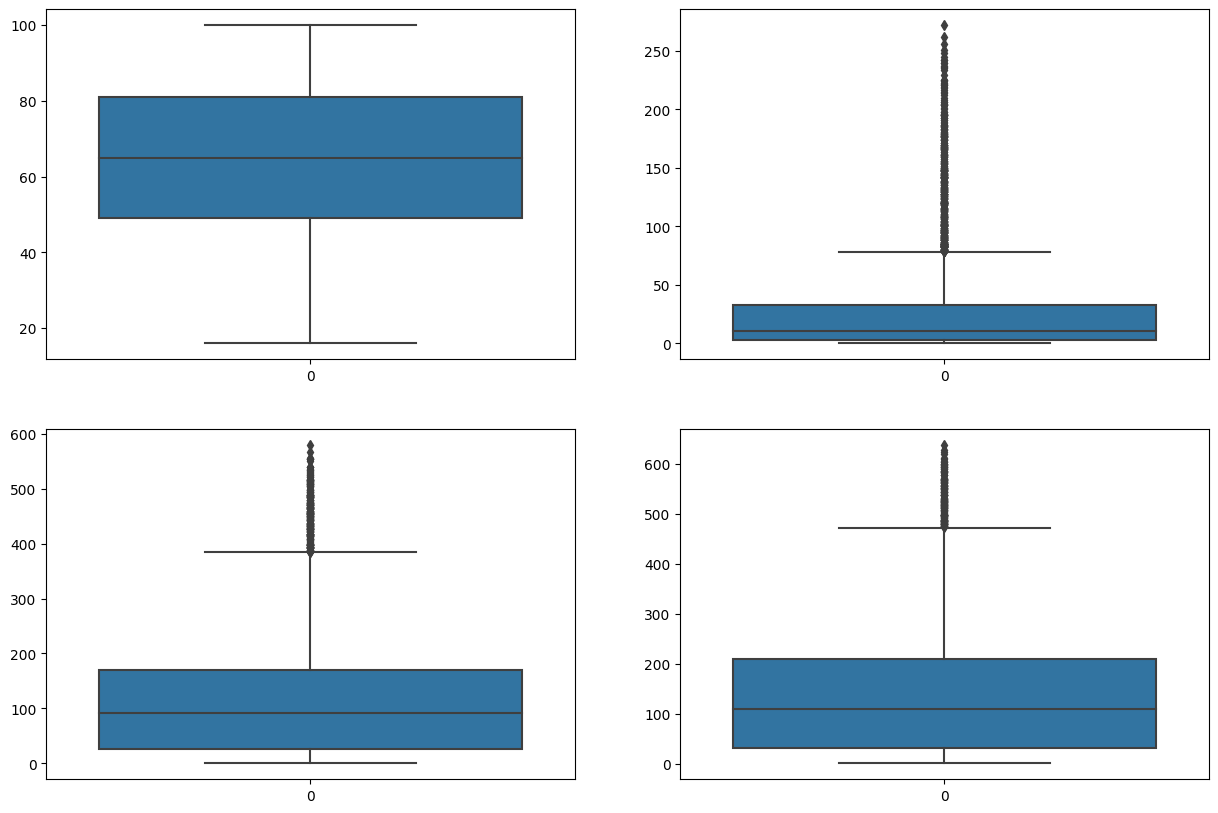

In [ ]:
features = ['humidity', 'casual', 'registered', 'count']

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
	plt.subplot(2, 2, i + 1)
	sb.boxplot(df[col])
plt.show()


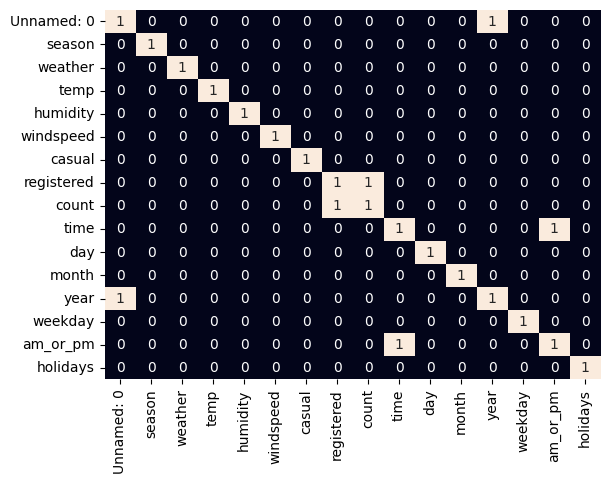

In [ ]:
sb.heatmap(df.corr() > 0.8,
		annot=True,
		cbar=False)
plt.show()


In [ ]:
df.drop(['registered', 'time'], axis=1, inplace=True)
df = df[(df['windspeed'] < 32) & (df['humidity'] > 0)]


In [ ]:
#model training

features = df.drop(['count'], axis=1)
target = df['count'].values

X_train, X_val, Y_train, Y_val = train_test_split(features,
												target,
												test_size = 0.1,
												random_state=22)
X_train.shape, X_val.shape


((5740, 13), (638, 13))

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


In [ ]:
from sklearn.metrics import mean_absolute_error as mae
models = [LinearRegression(), RandomForestRegressor()]

for i in range(2):
	models[i].fit(X_train, Y_train)

	print(f'{models[i]} : ')

	train_preds = models[i].predict(X_train)
	print('Training Error : ', mae(Y_train, train_preds))

	val_preds = models[i].predict(X_val)
	print('Validation Error : ', mae(Y_val, val_preds))
	print()


LinearRegression() : 
Training Error :  67.00342201242135
Validation Error :  65.16144687434266

RandomForestRegressor() : 
Training Error :  18.02234668989547
Validation Error :  47.90075235109718

